In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [97]:
#Scaling the dataset
data=pd.read_csv("student_performance.csv")
data=data.drop(columns="grade")
scalar=StandardScaler()
columns_Scaled=["student_id","weekly_self_study_hours","attendance_percentage","class_participation"]
data[columns_Scaled]=scalar.fit_transform(data[columns_Scaled])

print(data)
#Checking the null data value in dataset
print(data.isnull().sum())

        student_id  weekly_self_study_hours  ...  class_participation  total_score
0        -1.732049                 0.503067  ...            -1.116940         97.9
1        -1.732046                -0.149161  ...            -1.781419         83.9
2        -1.732042                 0.648006  ...            -0.350233        100.0
3        -1.732039                 1.546632  ...             0.518701        100.0
4        -1.732035                -0.236125  ...             0.467588         92.0
...            ...                      ...  ...                  ...          ...
999995    1.732035                 0.430597  ...            -0.605802        100.0
999996    1.732039                 0.097236  ...             0.365360         88.3
999997    1.732042                -0.120173  ...            -0.094664         87.9
999998    1.732046                 1.488656  ...            -0.350233        100.0
999999    1.732049                 0.474079  ...            -0.963598        100.0

[10

In [98]:
x=data[["weekly_self_study_hours","attendance_percentage","class_participation"]]
y=data["total_score"]
#training the model
model=LinearRegression()
model.fit(x,y)
#making the prediciton
predicted_scores=model.predict(x)


In [ ]:
mae=mean_absolute_error(y,predicted_scores)
mse=mean_squared_error(y,predicted_scores)
rmse=np.sqrt(mse)
r2=r2_score(y,predicted_scores)

print("mean_absolute_error : ",mae)
print("mean_squared_error : ",mse)
print("root mean sqquared error : ",rmse)
print("r2 score (Model Accuracy) : ",r2)



mean_absolute_error :  7.16876314854254
mean_squared_error :  81.04274804645821
root mean sqquared error :  9.002374578213141
recall score (Model Accuracy) :  0.659736285890138


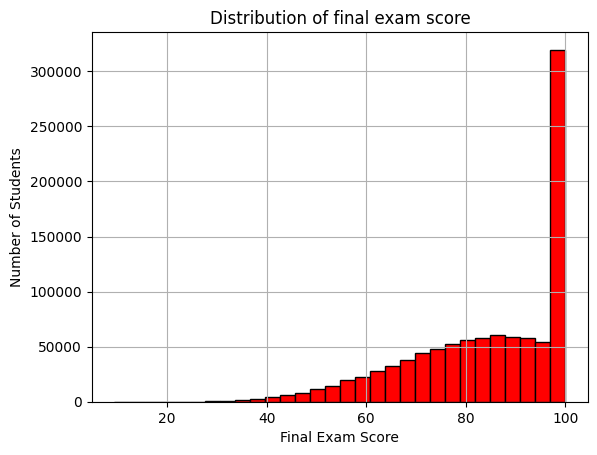

In [100]:
plt.figure()
plt.hist(data["total_score"],bins=30,color="red",edgecolor="black")
plt.title("Distribution of final exam score")
plt.xlabel("Final Exam Score")
plt.ylabel("Number of Students")
plt.grid(True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8736\3888679676.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(sample_data['weekly_self_study_hours'],


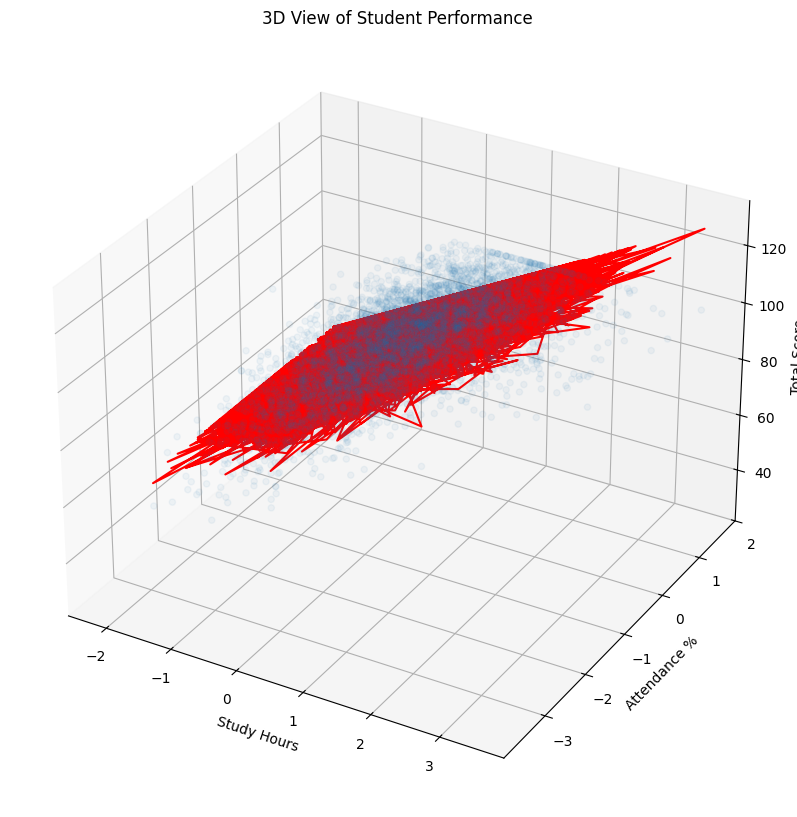

In [101]:
sample_data = data.sample(n=5000, random_state=42)
x_sample=sample_data[["weekly_self_study_hours","attendance_percentage","class_participation"]]
sample_predicted_scores=model.predict(x_sample)

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')

# We'll plot two features and the result
# x = Hours, y = Attendance, z = Actual Score
ax.scatter(sample_data['weekly_self_study_hours'], 
           sample_data['attendance_percentage'], 
           sample_data['total_score'], 
            cmap='viridis', alpha=0.05)
ax.plot(sample_data['weekly_self_study_hours'], sample_data['attendance_percentage'],sample_predicted_scores,c="red",label="Predicted score" )
ax.set_xlabel('Study Hours')
ax.set_ylabel('Attendance %')
ax.set_zlabel('Total Score')
plt.title("3D View of Student Performance")
plt.show()

In [ ]:

my_input = [[15, 95, 80]]

my_input_scaled = scalar.fit_transform(my_input)


my_prediction = model.predict(my_input_scaled)

print(f"Final  Prediction: {my_prediction[0]}")

Final Corrected Prediction: 84.2838453


c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
